#### Importing Libraries

In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
#train data
df=pd.read_csv('train.csv')
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [3]:
df. isnull(). sum() # checking if there are any null values

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

#### Dealing with Main category null values

In [4]:
df['maincateg'].unique()

array(['Women', 'Men', nan], dtype=object)

In [5]:
df[df['maincateg'].isnull()].head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
19,12336,Women Beige Heels Sandal,4.0,NaN,Flipkart,499,999,50.05%,NaN,NaN,28.0,9.0,10.0,2,5,0
38,20804,"Men Brown, Orange Sports Sandal",4.1,NaN,Flipkart,819,999,18.02%,26640.0,3667.0,14148.0,NaN,NaN,1113,2094,1
68,5575,Women Copper Flats Sandal,4.1,NaN,Flipkart,349,999,65.07%,NaN,27.0,NaN,NaN,22.0,5,15,1
91,4262,Slippers,3.6,NaN,Flipkart,213,249,14.46%,NaN,NaN,NaN,NaN,466.0,281,476,1
116,2767,Ace Slip-On Running Shoes For Men (Black),4.3,NaN,Flipkart,2999,4999,40.01%,NaN,NaN,46.0,27.0,5.0,1,5,1


#### We can observe that from title we can get maincateg value i.e, if title contains WOMEN, we will assign maincateg to 'Women' etc.

In [6]:
df.loc[df['title'].str.upper().str.contains('WOMEN') & df['maincateg'].isnull(), 'maincateg'] = 'Women'
df.loc[df['title'].str.upper().str.contains('MEN') & df['maincateg'].isnull(), 'maincateg'] = 'Men'
df['maincateg'].isnull().sum()

57

In [7]:
df[df['maincateg'].isnull()].head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
91,4262,Slippers,3.6,NaN,Flipkart,213,249,14.46%,NaN,NaN,NaN,NaN,466.0,281,476,1
228,18304,Slippers,3.8,NaN,Flipkart,141,499,71.74%,NaN,23.0,71.0,NaN,22.0,14,17,0
728,6801,Slides,3.7,NaN,Flipkart,419,998,58.02%,NaN,4.0,NaN,NaN,NaN,3,4,1
842,19010,Slides,3.9,NaN,Flipkart,2110,2995,29.55%,NaN,1.0,NaN,NaN,0.0,1,1,1
1056,7202,Flip Flops,3.8,NaN,Flipkart,326,499,34.67%,NaN,NaN,NaN,21.0,NaN,2,10,0


#### We will consider above values are for 'Unisex'

In [8]:
df.loc[df['maincateg'].isnull(), 'maincateg'] = 'Unisex'
df['maincateg'].isnull().sum()

0

In [10]:
cols=['maincateg']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,2,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,0,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,2,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,0,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,0,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [11]:
df['maincateg'].unique()

array([2, 0, 1])

In [12]:
df. isnull(). sum()

id              0
title           0
Rating          0
maincateg       0
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [13]:
df['platform'].unique()

array(['Flipkart', 'Amazon'], dtype=object)

In [14]:
cols=['platform']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,2,1,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,0,1,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,2,1,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,0,1,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,0,1,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


<AxesSubplot:>

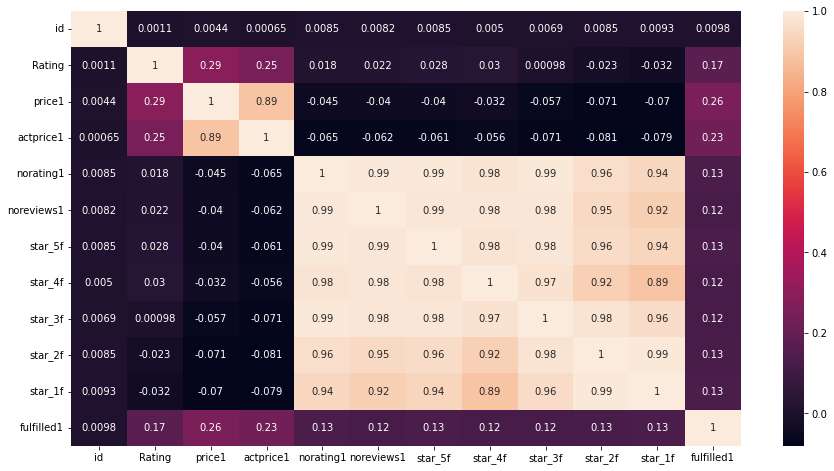

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(df.drop(['title', 'maincateg', 'platform'], axis='columns').corr(), annot=True)

#### From above plot, we can see norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f are highly corelated

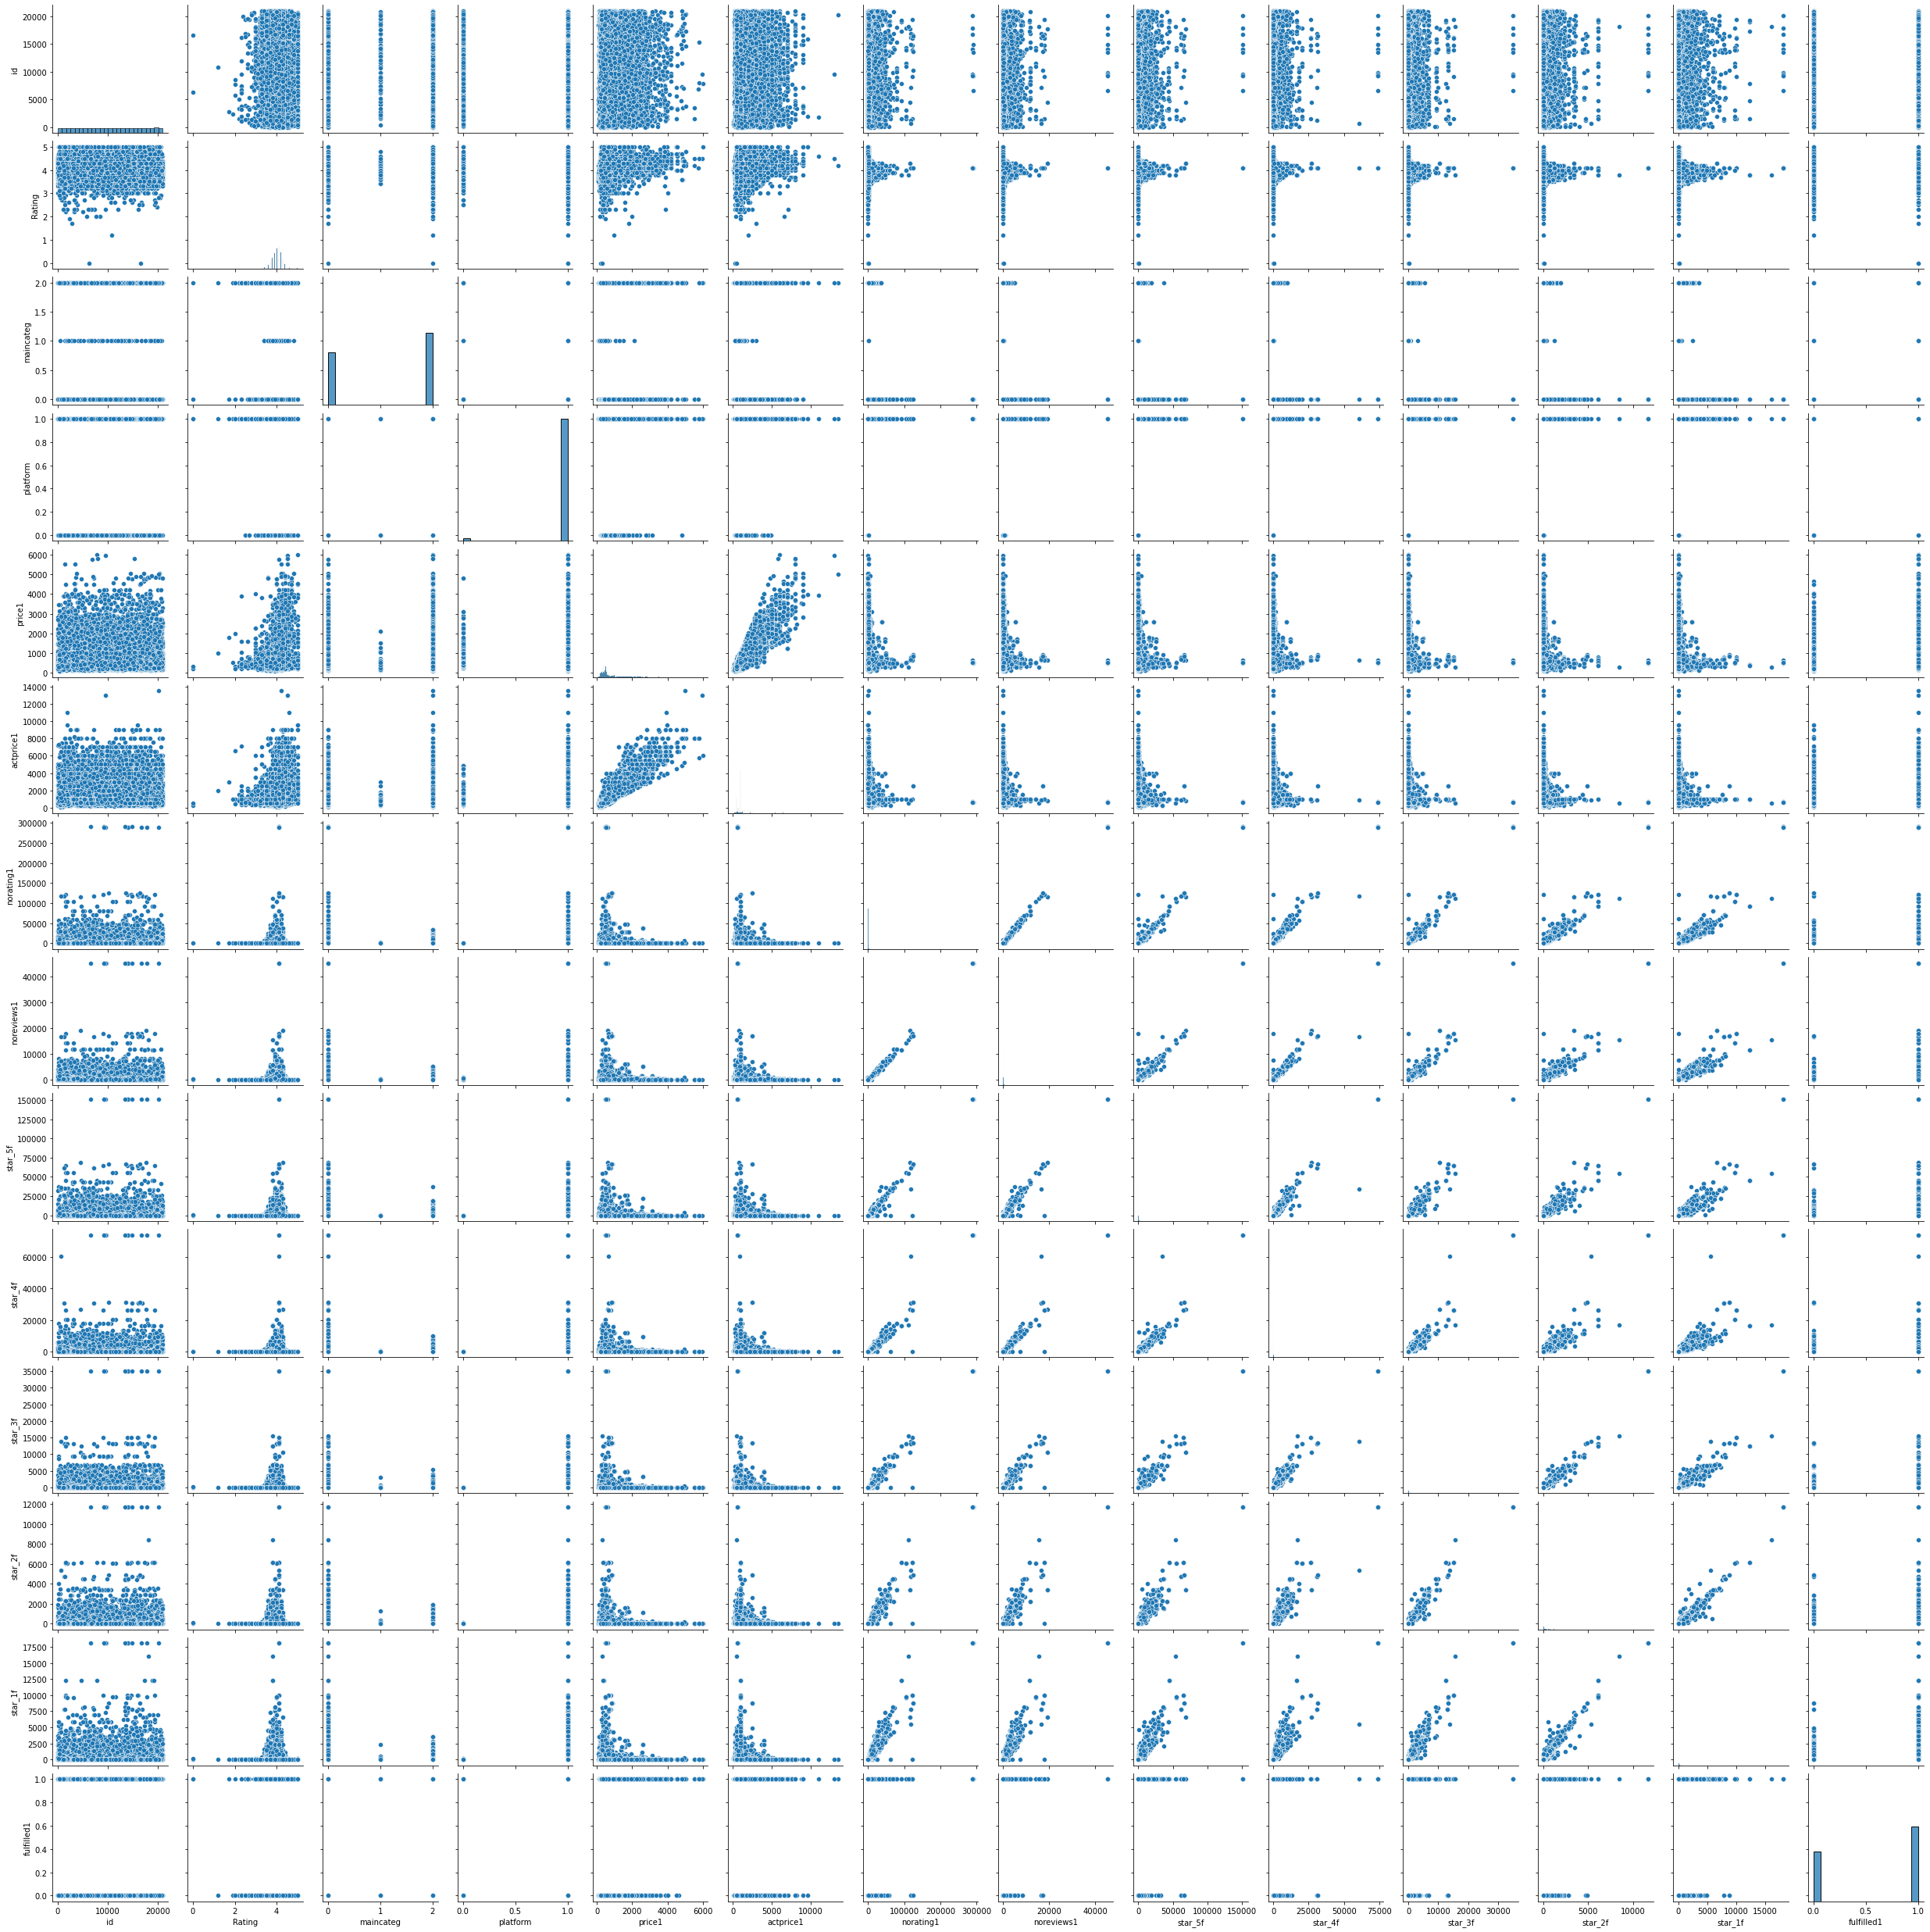

In [21]:
sns.pairplot(df)

In [22]:
df. isnull(). sum()

id              0
title           0
Rating          0
maincateg       0
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [23]:
#Dealing with star_3f null values
ncols=['star_2f','star_1f','star_3f']
xn=df[ncols]
xn

,star_2f,star_1f,star_3f
0,3,3,6.0
1,29,73,73.0
2,1,0,2.0
3,701,4595,5352.0
4,7,7,7.0
...,...,...,...
15725,41,43,61.0
15726,16,28,37.0
15727,10,15,20.0
15728,25,47,10.0


In [27]:
impute_knn = KNNImputer(n_neighbors=2)
dfn=impute_knn.fit_transform(xn)

In [28]:
dfn=pd.DataFrame(dfn,columns=['2f','1f','3f'])
df['star_3f']=dfn['3f']

,2f,1f,3f
0,3.0,3.0,6.0
1,29.0,73.0,73.0
2,1.0,0.0,2.0
3,701.0,4595.0,5352.0
4,7.0,7.0,7.0


In [32]:
#Dealing with star_5f null values
ncols=['star_2f','star_1f','star_5f']
xn=df[ncols]
dfn=impute_knn.fit_transform(xn)
dfn=pd.DataFrame(dfn,columns=['2f','1f','5f'])
df['star_5f']=dfn['5f']

In [34]:
#Dealing with star_4f null values
ncols=['star_2f','star_1f','star_4f']
xn=df[ncols]
dfn=impute_knn.fit_transform(xn)
dfn=pd.DataFrame(dfn,columns=['2f','1f','4f'])
df['star_4f']=dfn['4f']

In [36]:
#Dealing with norating1 null values
ncols=['star_2f','star_1f','norating1']
xn=df[ncols]
dfn=impute_knn.fit_transform(xn)
dfn=pd.DataFrame(dfn,columns=['2f','1f','nr1'])
df['norating1']=dfn['nr1']

In [37]:
#Dealing with noreviews1 null values
ncols=['star_2f','star_1f','noreviews1']
xn=df[ncols]
dfn=impute_knn.fit_transform(xn)
dfn=pd.DataFrame(dfn,columns=['2f','1f','nrv1'])
df['noreviews1']=dfn['nrv1']

In [38]:
df. isnull(). sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
price1        0
actprice1     0
Offer %       0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [81]:
#test data
dft=pd.read_csv('test.csv')
dft.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [82]:
dftid=dft['id']

In [40]:
dft.isnull().sum() # checking if there are any null values in test data

id              0
title           0
Rating        203
maincateg      67
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
dtype: int64

<AxesSubplot:>

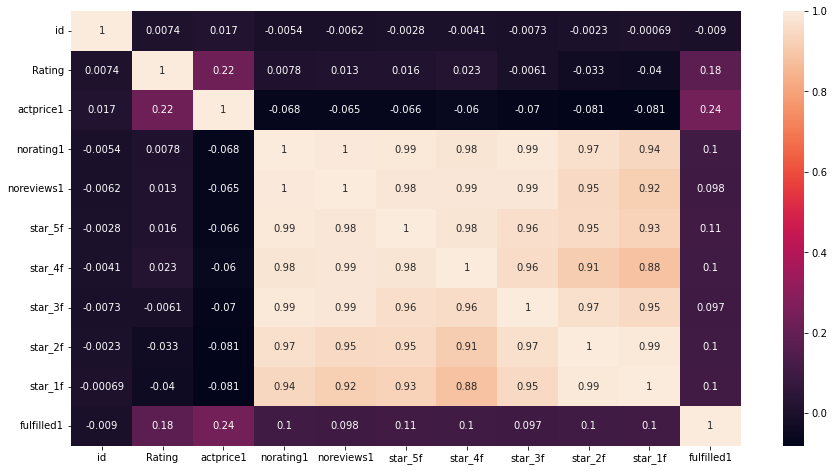

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(dft.drop(['title', 'maincateg', 'platform'], axis='columns').corr(), annot=True)

In [42]:
#Dealing with star_1f null values
ncols=['star_2f','star_3f','star_4f','star_1f']
xnt=dft[ncols]
dfnt=impute_knn.fit_transform(xnt)
dfnt=pd.DataFrame(dfnt,columns=['2f','3f','4f','1f'])
dft['star_1f']=dfnt['1f']

In [44]:
#Dealing with star_5f null values
ncols=['star_2f','star_3f','star_4f','star_5f']
xnt=dft[ncols]
dfnt=impute_knn.fit_transform(xnt)
dfnt=pd.DataFrame(dfnt,columns=['2f','3f','4f','5f'])
dft['star_5f']=dfnt['5f']

In [45]:
dft.isnull().sum()

id              0
title           0
Rating        203
maincateg      67
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f         0
star_4f         0
star_3f         0
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [46]:
#Dealing with main category null values
dft['maincateg'].unique()

array(['Men', 'Women', nan], dtype=object)

In [47]:
dft[dft['maincateg'].isnull()].head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
84,11588,Royal Jutis For men Mojaris For Men (Black),NaN,NaN,Flipkart,899,41,7,22.0,9,3,1,6.0,0
88,15449,Flip Flops,NaN,NaN,Flipkart,499,3073,401,1248.0,517,510,274,467.0,1
146,5574,Women Red Heels Sandal,NaN,NaN,Flipkart,699,7128,1203,3846.0,1358,797,333,590.0,0
182,20276,Quest 2 Running Shoe For Men (Black),NaN,NaN,Flipkart,5995,325,58,205.0,62,29,9,18.0,1
249,15115,WILLY-2 Bellies For Women (Red),NaN,NaN,Flipkart,499,44,3,11.0,14,4,6,9.0,1


In [48]:
dft.loc[dft['title'].str.upper().str.contains('WOMEN') & dft['maincateg'].isnull(), 'maincateg'] = 'Women'
dft.loc[dft['title'].str.upper().str.contains('MEN') & dft['maincateg'].isnull(), 'maincateg'] = 'Men'
dft.loc[dft['maincateg'].isnull(), 'maincateg'] = 'Unisex'
dft['maincateg'].isnull().sum()

0

In [49]:
dft.isnull().sum()

id              0
title           0
Rating        203
maincateg       0
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f         0
star_4f         0
star_3f         0
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [50]:
#Dealing with rating null values
feature = 'Rating'
simple_imputer_mode_Rating = SimpleImputer(strategy='mean')
simple_imputer_mode_Rating.fit(dft[[feature]])
dft[feature] = simple_imputer_mode_Rating.transform(dft[[feature]])

In [51]:
dft.isnull().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [52]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,2,1,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,0,1,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,2,1,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,0,1,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,0,1,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [53]:
df.drop(['id','title','Offer %'],axis=1,inplace=True) #Dropping unwanted columns from train data
df.head()

,Rating,maincateg,platform,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.9,2,1,698,999,38.0,7.0,17.0,9.0,6.0,3,3,0
1,3.8,0,1,999,1999,531.0,69.0,264.0,92.0,73.0,29,73,1
2,4.4,2,1,2749,4999,17.0,4.0,11.0,3.0,2.0,1,0,1
3,4.2,0,1,518,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,3.9,0,1,1379,2299,77.0,3.0,35.0,21.0,7.0,7,7,1


In [56]:
dft.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [58]:
dft.drop(['id','title'],axis=1,inplace=True) #Dropping unwanted columns from test data
dft.head()

,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [59]:
cols=['maincateg','platform']
dft[cols]=dft[cols].apply(LabelEncoder().fit_transform) #One hot encoding
dft.head()

,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.8,0,1,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,3.9,2,1,499,3015,404,1458.0,657,397,182,321.0,1
2,3.9,2,1,999,449,52,229.0,70,71,33,46.0,1
3,3.9,0,1,2999,290,40,141.0,51,49,17,32.0,1
4,3.9,0,1,999,2423,326,1265.0,414,293,143,308.0,0


In [64]:
from sklearn.model_selection import train_test_split
X=df.drop(['price1'],axis=1)
y=df['price1']
X_train, X_test, y_train ,y_test = train_test_split( X, y, test_size=0.25,  random_state=42 )

In [69]:
RMSE_test = []
RMSE_train = []
Model_Name = []

In [70]:
model_list = [RandomForestRegressor(),XGBRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor(),
               AdaBoostRegressor(),LinearRegression()]

for model in model_list:
    print(model)
    model.fit(X_train, y_train)

    print('Test Set --------------')
    y_predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, y_predictions)
    rmse = np.sqrt(mse)
    score = model.score(X_test,y_test)

    RMSE_test.append(rmse)
    Model_Name.append( 'RandomForestRegressor' )

    print('Root Mean Square Error : ', rmse )
    print('R2 Score : ', score )
    print('\n')

    print('Train Set --------------')
    y_predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, y_predictions)
    rmse = np.sqrt(mse)
    score = model.score(X_train,y_train)
    RMSE_train.append(rmse)
    print('Root Mean Square Error : ', rmse ) 
    print('R2 Score : ', score )
    
    print('\n')
    print('\n')
    print("-------------------------------------------------------------------------------")

RandomForestRegressor()
Test Set --------------
Root Mean Square Error :  206.11083512011862
R2 Score :  0.902727801745519


Train Set --------------
Root Mean Square Error :  79.29046330273684
R2 Score :  0.9849121158946154




-------------------------------------------------------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
            

In [71]:
params = {'bootstrap': [True, False],
             'max_depth': [2,3,5,6],
             'min_samples_leaf': [1,2,3,4],
             'min_samples_split': [1,2,5],
             'n_estimators': [50,100,500]
         }

model = RandomForestRegressor() 
GS_CV = GridSearchCV(estimator=model, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=3)
GS_CV.fit(X_train, y_train)
print("Best parameters:", GS_CV.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_est

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-107549.001 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-94966.629 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-101195.363 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-98195.603 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-103887.006 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=2, min_samp

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-107280.981 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-95477.051 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-101410.478 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-99085.193 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-104378.213 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-107317.145 total time=   0.6s
[CV 2/5] END bootstrap=True, max_depth=2, 

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=2, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=2, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=2, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=True, max_depth=2, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=2, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=2, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=2, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-107796.007 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-93703.544 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-99581.177 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-98429.751 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-104450.214 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=2, min_sampl

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-107937.828 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-96255.831 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-98611.345 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-99149.104 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-104320.555 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=2, min_sampl

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-94892.615 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-80004.250 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-79144.525 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-89438.336 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-85577.446 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=3, min_samples

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=3, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=True, max_depth=3, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=3, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=3, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-94813.354 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-79794.658 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-79009.353 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-89462.665 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-85579.259 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=3, min_samples

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-95018.213 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-80049.877 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-78929.303 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-89736.320 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-87492.682 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=-94996.784 total time=   0.8s
[CV 2/5] END bootstrap=True, max_depth=3, min_

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=3, min_samples_leaf=4, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, min_samples_leaf=4, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=True, max_depth=3, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=3, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-94920.987 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-80227.153 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-78634.502 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-90034.342 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-87264.562 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=3, min_samples

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-84888.828 total time=   0.6s
[CV 2/5] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-70017.670 total time=   0.6s
[CV 3/5] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-69560.889 total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-77100.296 total time=   0.6s
[CV 5/5] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-74628.891 total time=   0.6s
[CV 1/5] END bootstrap=True, max_depth=5, min_samples

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-84715.347 total time=   0.6s
[CV 2/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-69643.502 total time=   0.6s
[CV 3/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-69380.238 total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-77419.982 total time=   0.6s
[CV 5/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-73321.739 total time=   0.6s
[CV 1/5] END bootstrap=True, max_depth=5, min_samples

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-84782.051 total time=   0.8s
[CV 2/5] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-70109.775 total time=   0.7s
[CV 3/5] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-69508.375 total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-77641.201 total time=   0.6s
[CV 5/5] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-74158.462 total time=   0.6s
[CV 1/5] END bootstrap=True, max_depth=5, min_samples

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-85062.977 total time=   0.6s
[CV 2/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-70180.890 total time=   0.6s
[CV 3/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-68860.421 total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-76641.046 total time=   0.6s
[CV 5/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-73134.097 total time=   0.6s
[CV 1/5] END bootstrap=True, max_depth=5, min_samples

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=True, max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-79494.856 total time=   0.7s
[CV 2/5] END bootstrap=True, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-65324.862 total time=   0.7s
[CV 3/5] END bootstrap=True, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-64416.452 total time=   0.7s
[CV 4/5] END bootstrap=True, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-72221.561 total time=   0.7s
[CV 5/5] END bootstrap=True, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-68813.519 total time=   0.7s
[CV 1/5] END bootstrap=True, max_depth=6, min_samples

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=6, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=6, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=6, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=True, max_depth=6, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=6, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=6, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-78778.706 total time=   0.7s
[CV 2/5] END bootstrap=True, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-64243.721 total time=   0.7s
[CV 3/5] END bootstrap=True, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-64962.963 total time=   0.7s
[CV 4/5] END bootstrap=True, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-71214.202 total time=   0.7s
[CV 5/5] END bootstrap=True, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-67740.372 total time=   0.7s
[CV 1/5] END bootstrap=True, max_depth=6, min_samples

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=True, max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=True, max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-78959.379 total time=   0.7s
[CV 2/5] END bootstrap=True, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-64475.887 total time=   0.7s
[CV 3/5] END bootstrap=True, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-63692.521 total time=   0.7s
[CV 4/5] END bootstrap=True, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-71485.117 total time=   0.7s
[CV 5/5] END bootstrap=True, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-68478.002 total time=   0.7s
[CV 1/5] END bootstrap=True, max_depth=6, min_samples

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END bootstrap=True, max_depth=6, min_samples_leaf=4, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=6, min_samples_leaf=4, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=6, min_samples_leaf=4, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END bootstrap=True, max_depth=6, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=6, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END bootstrap=True, max_depth=6, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=6, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END bootstrap=True, max_depth=6, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-80650.274 total time=   0.7s
[CV 2/5] END bootstrap=True, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-65019.253 total time=   0.7s
[CV 3/5] END bootstrap=True, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-63799.211 total time=   0.7s
[CV 4/5] END bootstrap=True, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-72085.890 total time=   0.7s
[CV 5/5] END bootstrap=True, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-70264.547 total time=   0.7s
[CV 1/5] END bootstrap=True, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-79299.882 total time=   1.5s
[CV 2/5] END bootstrap=True, max_depth=6, min_

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-111843.819 total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-100864.880 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-103993.266 total time=   0.3s
[CV 4/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-103743.190 total time=   0.3s
[CV 5/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-109896.753 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=2

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=False, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=False, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=False, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-111843.819 total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-100864.880 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-103993.266 total time=   0.3s
[CV 4/5] END bootstrap=False, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-103743.190 total time=   0.3s
[CV 5/5] END bootstrap=False, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-109896.753 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=2

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END bootstrap=False, max_depth=2, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=2, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END bootstrap=False, max_depth=2, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=2, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END bootstrap=False, max_depth=2, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-111843.819 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-100864.880 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-103993.266 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-103743.190 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-109896.753 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=-111843.819 total time=   0.6s
[CV 2/5] END bootstrap=False, max

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END bootstrap=False, max_depth=2, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=2, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END bootstrap=False, max_depth=2, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=2, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END bootstrap=False, max_depth=2, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-111843.819 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-100864.880 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-103993.266 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-103743.190 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-109896.753 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-111843.819 total time=   0.6s
[CV 2/5] END bootstrap=False, max

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-96637.761 total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-83432.470 total time=   0.4s
[CV 3/5] END bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-82268.008 total time=   0.4s
[CV 4/5] END bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-92200.309 total time=   0.4s
[CV 5/5] END bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-94144.229 total time=   0.4s
[CV 1/5] END bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-96637.761 total time=   0.9s
[CV 2/5] END bootstrap=False, max_depth

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END bootstrap=False, max_depth=3, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=False, max_depth=3, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-96637.761 total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-83432.470 total time=   0.4s
[CV 3/5] END bootstrap=False, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-82268.008 total time=   0.4s
[CV 4/5] END bootstrap=False, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-92200.309 total time=   0.4s
[CV 5/5] END bootstrap=False, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-94144.229 total time=   0.4s
[CV 1/5] END bootstrap=False, max_depth=3, min

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-96637.761 total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-83432.470 total time=   0.4s
[CV 3/5] END bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-82268.008 total time=   0.4s
[CV 4/5] END bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-92200.309 total time=   0.4s
[CV 5/5] END bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-94144.229 total time=   0.4s
[CV 1/5] END bootstrap=False, max_depth=3, min

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END bootstrap=False, max_depth=3, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END bootstrap=False, max_depth=3, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END bootstrap=False, max_depth=3, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-96637.761 total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-83432.470 total time=   0.4s
[CV 3/5] END bootstrap=False, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-82268.008 total time=   0.4s
[CV 4/5] END bootstrap=False, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-92200.309 total time=   0.4s
[CV 5/5] END bootstrap=False, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-94144.229 total time=   0.4s
[CV 1/5] END bootstrap=False, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-96637.761 total time=   0.9s
[CV 2/5] END bootstrap=False, max_depth

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-89261.840 total time=   0.7s
[CV 2/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-77509.532 total time=   0.7s
[CV 3/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-77014.954 total time=   0.7s
[CV 4/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-84690.045 total time=   0.7s
[CV 5/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-84803.274 total time=   0.7s
[CV 1/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-89261.840 total time=   1.6s
[CV 2/5] END bootstrap=False, max_depth

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-89261.840 total time=   0.7s
[CV 2/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-77509.532 total time=   0.7s
[CV 3/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-78279.989 total time=   0.9s
[CV 4/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-84619.657 total time=   0.9s
[CV 5/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-85589.418 total time=   1.2s
[CV 1/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-89261.840 total time=   1.8s
[CV 2/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-77509.532 total time=   1.9s
[CV 3/5] END bootstrap=False, ma

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-89259.091 total time=   0.9s
[CV 2/5] END bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-77509.532 total time=   0.9s
[CV 3/5] END bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-77082.612 total time=   0.9s
[CV 4/5] END bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-83661.828 total time=   0.8s
[CV 5/5] END bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-85589.418 total time=   0.9s
[CV 1/5] END bootstrap=False, max_depth=5, min

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=False, max_depth=5, min_samples_leaf=4, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=5, min_samples_leaf=4, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, min_samples_leaf=4, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, min_samples_leaf=4, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END bootstrap=False, max_depth=5, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=5, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END bootstrap=False, max_depth=5, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=5, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END bootstrap=False, max_depth=5, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-89260.178 total time=   0.9s
[CV 2/5] END bootstrap=False, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-77509.532 total time=   0.9s
[CV 3/5] END bootstrap=False, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-76836.547 total time=   0.9s
[CV 4/5] END bootstrap=False, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-83661.828 total time=   0.9s
[CV 5/5] END bootstrap=False, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-83779.350 total time=   0.8s
[CV 1/5] END bootstrap=False, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-89260.178 total time=   1.8s
[CV 2/5] END bootstrap=False, max_depth

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END bootstrap=False, max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END bootstrap=False, max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=False, max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=6, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-88904.254 total time=   0.8s
[CV 2/5] END bootstrap=False, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-71820.454 total time=   0.8s
[CV 3/5] END bootstrap=False, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-76796.700 total time=   0.8s
[CV 4/5] END bootstrap=False, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-81143.741 total time=   0.8s
[CV 5/5] END bootstrap=False, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-80875.545 total time=   0.8s
[CV 1/5] END bootstrap=False, max_depth=6, min

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END bootstrap=False, max_depth=6, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=6, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=6, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END bootstrap=False, max_depth=6, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=6, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-88344.945 total time=   0.8s
[CV 2/5] END bootstrap=False, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-71591.932 total time=   0.8s
[CV 3/5] END bootstrap=False, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-80946.793 total time=   0.8s
[CV 4/5] END bootstrap=False, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-81383.713 total time=   0.8s
[CV 5/5] END bootstrap=False, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-80985.618 total time=   0.8s
[CV 1/5] END bootstrap=False, max_depth=6, min

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END bootstrap=False, max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END bootstrap=False, max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=6, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-88516.346 total time=   0.8s
[CV 2/5] END bootstrap=False, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-72595.639 total time=   0.8s
[CV 3/5] END bootstrap=False, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-79354.493 total time=   0.8s
[CV 4/5] END bootstrap=False, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=-77712.414 total time=   0.8s
[CV 5/5] END bootstrap=False, max_depth=6, min_sampl

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\priya\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-88643.562 total time=   0.9s
[CV 2/5] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-72595.639 total time=   1.0s
[CV 3/5] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-78239.533 total time=   0.9s
[CV 4/5] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-77020.977 total time=   1.0s
[CV 5/5] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-78927.223 total time=   1.0s
[CV 1/5] END bootstrap=False, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-88636.727 total time=   1.9s
[CV 2/5] END bootstrap=False, max_depth

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [             nan              nan              nan -101158.72051648
 -101055.1115863  -100840.12115904 -100820.9140632  -100929.80432158
 -101145.69640708              nan              nan              nan
 -101526.38315709 -101110.38573151 -100888.15517907 -101122.2024936
 -100924.00542808 -100842.57265634              nan              nan
              nan -100792.13858489 -101224.99044087 -101006.35642917
 -100947.25489579 -100950.53926811 -101125.76909119              nan
              nan              nan -101254.93236507 -100902.97101316
 -100941.93791906 -100911.15422157 -101439.32039629 -101087.85732063
              nan              nan              nan  -85811.43441263
  -85928.85930658  -85926.90631363  -85856.52831634  -86105.62303308
  -85906.68936329              nan              nan              nan
  -85731.85784493  -85672.6701

Best parameters: {'bootstrap': True, 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [72]:
#With best parameters obtained above
model = RandomForestRegressor(bootstrap=True, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=100) 

model.fit(X_train, y_train)

print('Test Set --------------')
y_predictions = model.predict(X_test)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_test,y_test)

print('Root Mean Square Error : ', rmse )
print('R2 Score : ', score )
print('\n')

print('Train Set --------------')
y_predictions = model.predict(X_train)
mse = mean_squared_error(y_train, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_train,y_train)
RMSE_train.append(rmse)
print('Root Mean Square Error : ', rmse ) 
print('R2 Score : ', score )
print("-------------------------------------------------------------------------------")

Test Set --------------
Root Mean Square Error :  259.277321373874
R2 Score :  0.846072524321718


Train Set --------------
Root Mean Square Error :  243.28022129559832
R2 Score :  0.8579634768512407
-------------------------------------------------------------------------------


In [73]:
final_model = XGBRegressor(colsample_bytree=0.7,learning_rate=0.1,max_depth=3,n_estimators=500)
final_model.fit(X_train,y_train)
#final_predictions = final_model.predict(df_Test)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [74]:
pred=final_model.predict(dft)

In [85]:
preddf=pd.DataFrame(pred,columns=['price1'])
preddf.head()

,price1
0,392.129425
1,310.158447
2,380.668365
3,1097.118530
4,390.818420


In [86]:
#dftid=dft['id']
finres = pd.concat([dftid,preddf], axis='columns')
finres.head()

,id,price1
0,2242,392.129425
1,20532,310.158447
2,10648,380.668365
3,20677,1097.118530
4,12593,390.818420


In [87]:
finres.to_csv('result.csv',index=False)